In [ ]:
primary NK cell distribution Date: Feb 19, 2025


Processing: ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_0min_CD56dim_UMAP_G1.fcs
The smallest positive value in ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_0min_CD56dim_UMAP_G1.fcs is: 0.00036399890086613595
It is located in column index: 22
The parameter with the smallest positive value is: b'CD11c'

Processing: ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_2min_CD56dim_UMAP_G1.fcs
The smallest positive value in ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_2min_CD56dim_UMAP_G1.fcs is: 2.3150607376010157e-05
It is located in column index: 27
The parameter with the smallest positive value is: b'pSLP76'

Processing: ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_4min_CD56dim_UMAP_G1.fcs
The smallest positive value in ./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_4min_CD56dim_UMAP_G1.fcs is: 0.00015153725689742714
It is located in column index: 26
The parameter with the smalles

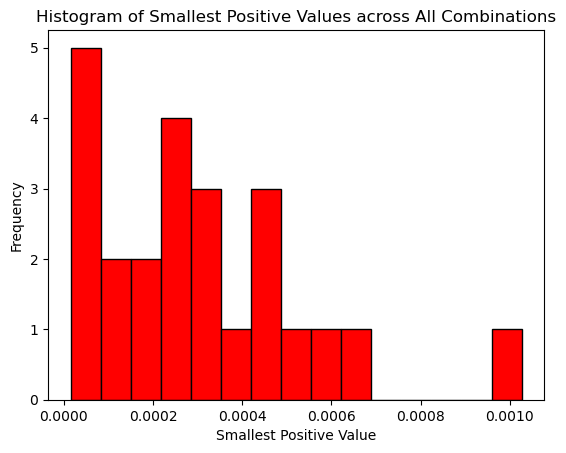

    Smallest Positive Value
0                  0.000364
1                  0.000023
2                  0.000152
3                  0.000108
4                  0.000039
5                  0.000027
6                  0.000015
7                  0.000036
8                  0.000271
9                  0.000162
10                 0.000272
11                 0.000313
12                 0.000499
13                 0.000591
14                 0.000218
15                 0.000430
16                 0.000334
17                 0.000084
18                 0.000430
19                 0.001026
20                 0.000329
21                 0.000443
22                 0.000688
23                 0.000241
The minimum smallest values 1.5497778804274276e-05


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fcsextract

# List of cell cycle stages and time points
cell_cycle_stages = ['G1', 'S', 'G2']
time_points = [0,2,4,8,16,32,64,256]

# Initialize a list to store all smallest positive values
smallest_positive_values = []

# Loop through each combination of cell cycle stage and time point
for stage in cell_cycle_stages:
    for time_point in time_points:
        # Construct the filename based on the current stage and time point
        # path = './data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'

        filename = f'./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_{time_point}min_CD56dim_UMAP_{stage}.fcs'
        
        # Use fcsextract to parse the FCS file
        metadata, data = fcsextract.fcsextract(filename)
        
        print(f"\nProcessing: {filename}")
        
        # Convert to numpy array
        data = np.array(data)

        # Extracting parameter names
        param_names = []
        for i in range(int(metadata[b'$PAR'])):
            param_names.append(metadata.get(b"$P%dS"%(i+1), metadata[b"$P%dN"%(i+1)]))
        
        # Select the relevant data (columns of interest)
        data = data[:, 8:48]  # Adjust this if necessary based on your dataset
        param_names = param_names[8:48]
        
        # Find the smallest positive number in the data
        positive_data = data[data > 0]  # Filter out non-positive numbers (<= 0)
        smallest_positive_value = np.min(positive_data)  # Find the smallest positive value
        
        # Store this smallest positive value in the list
        smallest_positive_values.append(smallest_positive_value)
        
        # Find the column index where the smallest positive value is located
        indices = np.where(data == smallest_positive_value)
        column_index = indices[1][0]  # Get the first occurrence of the smallest positive value
        
        # Get the parameter name for this column
        param_name_with_smallest_value = param_names[column_index]
        
        print(f"The smallest positive value in {filename} is: {smallest_positive_value}")
        print(f"It is located in column index: {column_index}")
        print(f"The parameter with the smallest positive value is: {param_name_with_smallest_value}")
        
# Plot a red histogram for the smallest positive values across all combinations
plt.hist(smallest_positive_values, bins=15, color='r', edgecolor='black')  # Red histogram
plt.title("Histogram of Smallest Positive Values across All Combinations")
plt.xlabel("Smallest Positive Value")
plt.ylabel("Frequency")
#plt.xscale('log')
plt.show()

# Convert results to a DataFrame for easy review (optional)
results_df = pd.DataFrame(smallest_positive_values, columns=["Smallest Positive Value"])
print(results_df)


print(f'The minimum smallest values {np.min(smallest_positive_values)}')

Look at different distribution Date Feb 20,2025

<class 'dict'>
<class 'list'>
b'56'
5343
[b'time', b'cell_length', b'BC1', b'BC2', b'BC3', b'BC4', b'BC5', b'BC6', b'CD7', b'CD45', b'IdU', b'CD57', b'3_gp_61_15', b'CD96', b'pCrkL', b'Cholera-b', b'pH3', b'pPLCg2', b'CD8', b'CD16', b'pCreb', b'pSTAT5', b'CD107a', b'pAkt', b'MAPKAPK2', b'NKG2D', b'CRACC', b'cyclinB', b'SAP', b'CD161', b'CD11c', b'2B4', b'DAP12', b'CD69', b'EAT2', b'pSLP76', b'pNFkB', b'pRb', b'pErk1-2', b'pPlk1', b'p38', b'pLAT', b'pZAP70', b'pS6', b'Ki67', b'NKG2A', b'pVav1', b'CD56', b'DNA1', b'DNA2', b'cisplatin', b'File Number', b'beadDist', b'barcode', b'UMAP_1', b'UMAP_2']
The smallest positive value is: 2.3150607376010157e-05
It is located in column index: 27
The parameter (protein) with the smallest positive value is: b'pSLP76'
b'CD16'
len=5343


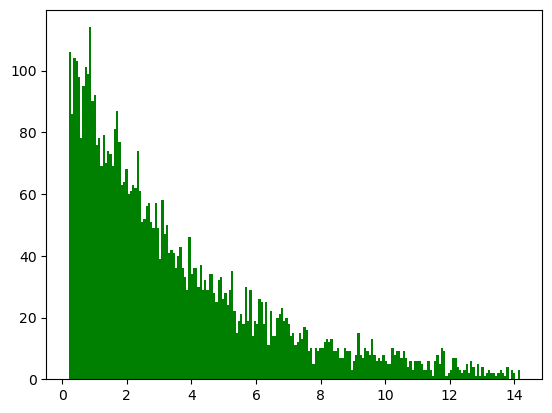

the size of data is 5343
The average value of the protein is 3.477059231901267
minimum value for a particular protein is 0.20669718086719513


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fcsextract

#greg's gating 
path = './data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'
filename=path+'2min_CD56dim_UMAP_G1.fcs'



 # Use fcsextract to parse the FCS file
metadata, data = fcsextract.fcsextract(filename)



print(type(metadata))   #dictionary
print(type(data)) #list
data=np.array(data)

print(metadata[b'$PAR']) #number of parameters
print(len(data[:,1]))

#extracting param_names
param_names = []
for i in range(int(metadata[b'$PAR'])):
      param_names.append(metadata.get(b"$P%dS"%(i+1),metadata[b"$P%dN"%(i+1)]))
  
#print(param_names)

print(param_names)



data=data[:,8:48]
param_names=param_names[8:48]




#--------------------------------smallest positive value-------------------------------------

# Find the smallest positive number in the data
positive_data = data[data > 0]  # Filter out non-positive numbers (<= 0)
# Find the smallest positive value
smallest_positive_value = np.min(positive_data)

# Now, find the index of the column that has the smallest positive value
# We can use np.where() to find the indices of all values in the dataset that are equal to the smallest positive value
# Then we map these indices back to the original columns (parameters)

# Find the indices of the smallest positive value in the original data (including the column and row)
indices = np.where(data == smallest_positive_value)

# indices[0] gives the row index and indices[1] gives the column index
# Get the column index of the smallest positive value
column_index = indices[1][0]  # Take the first occurrence if there are multiple

# Retrieve the name of the parameter (protein) corresponding to that column index
param_name_with_smallest_value = param_names[column_index]

print(f"The smallest positive value is: {smallest_positive_value}")
print(f"It is located in column index: {column_index}")
print(f"The parameter (protein) with the smallest positive value is: {param_name_with_smallest_value}")

#------------------------------------------------------------------------------


#--------------------------------histogram of individual protein -------------------------------------

#plotting histogram of the protein
#index=22 #CD69
index=column_index  #minimum
index=11  #CD107a
#index=42 #EAT2
print(param_names[index])
Y=data[:,index]
print(f"len={len(Y)}")


#-----------------------Data transformation--------------------------

#transformation 1- pruning negative data
#Y=Y[Y>0]
#Y=np.log(Y)

# # transformation 2- Calculate the minimum value of the data
# min_value = np.min(Y)
    
# # Calculate the constant to add so that the minimum value becomes 1e-11
# constant_to_add = 1e-11 - min_value if min_value < 1e-11 else 0
    
# # Add the constant to all elements of the data if needed
# if constant_to_add > 0:
#        Y += constant_to_add

#transformation 3
#Y[Y<0]=1e-11
#Y=np.log(Y)


plt.hist(Y,bins=200,color='g')#
#plt.hist(Y,bins=200,range=[-20, +20],color='g')
plt.show()



size_of_data=len(Y)
print(f'the size of data is {size_of_data}')
avg_protein=np.mean(Y)
print(f'The average value of the protein is {avg_protein}')
print(f'minimum value for a particular protein is {np.min(Y)}')
